# Basic classification: Classify images of clothing

https://www.tensorflow.org/tutorials/keras/classification

Goal: Classify clothing from the Fashion MNIST dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.14.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shity/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [4]:
x_train.shape


(60000, 28, 28)

In [5]:
len(y_train)

60000

In [10]:
x_test.shape

(10000, 28, 28)

## Preprocessing

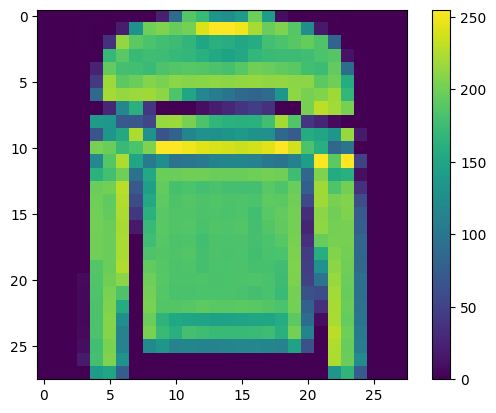

In [11]:
plt.figure()
plt.imshow(x_train[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
x_train = x_train / 255.0
x_test = x_test / 255.0 


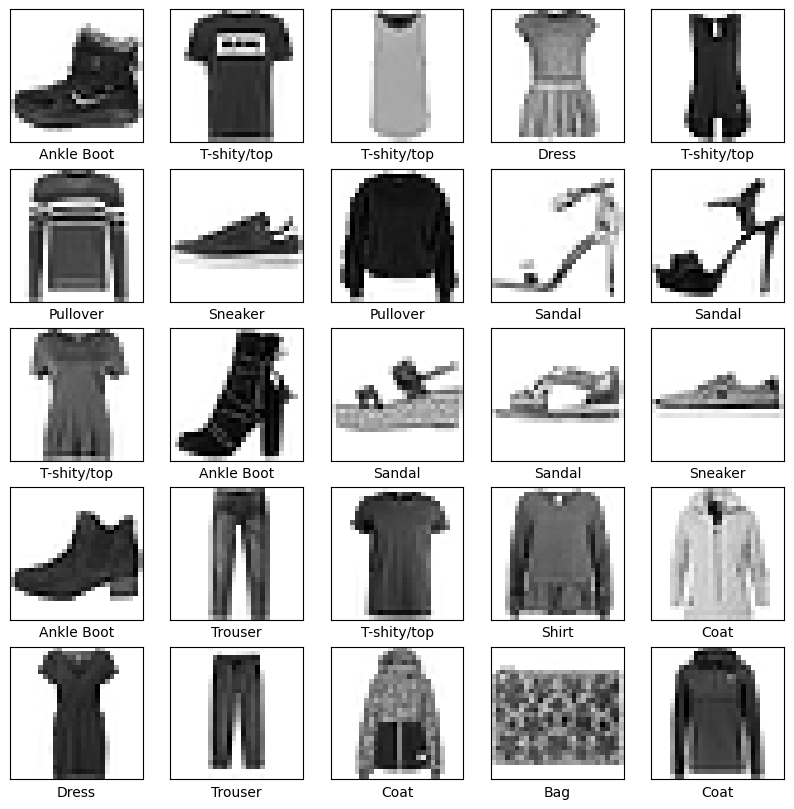

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

## Build the model

Networks are like ogres they have layers.

This is a model with 3 layers:
Flatten - Dense - Dense

Flatten Layers transforms the imagesinto a one dimenionsal array.
Dense Layers:
    128 - arbritary number but is a power of 2 so it fits easier for computational math.
    10 - is for the nubmer of classes we are predicting for.

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


## Compiling

Optimizer - Updates based on data from loss function
Loss - This is a function that minimizes deviation and derivation steers the function towards 0
Metric - This is accuracy

In [22]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optim,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



## Train

In [23]:
history =  model.fit(x_train,y_train, batch_size = 16,epochs=25,validation_data=(x_test, y_test))

Epoch 1/25
3750/3750 [==============================] - 4s 964us/step - loss: 0.3470 - accuracy: 0.8746 - val_loss: 0.3655 - val_accuracy: 0.8667
Epoch 2/25
3750/3750 [==============================] - 4s 945us/step - loss: 0.3182 - accuracy: 0.8829 - val_loss: 0.4033 - val_accuracy: 0.8575
Epoch 3/25
3750/3750 [==============================] - 4s 939us/step - loss: 0.2998 - accuracy: 0.8898 - val_loss: 0.3692 - val_accuracy: 0.8696
Epoch 4/25
3750/3750 [==============================] - 4s 946us/step - loss: 0.2859 - accuracy: 0.8948 - val_loss: 0.3764 - val_accuracy: 0.8661
Epoch 5/25
3750/3750 [==============================] - 4s 942us/step - loss: 0.2709 - accuracy: 0.8980 - val_loss: 0.3513 - val_accuracy: 0.8764
Epoch 6/25
3750/3750 [==============================] - 4s 950us/step - loss: 0.2627 - accuracy: 0.9009 - val_loss: 0.3747 - val_accuracy: 0.8697
Epoch 7/25
3750/3750 [==============================] - 4s 946us/step - loss: 0.2508 - accuracy: 0.9068 - val_loss: 0.3353 -

## Evaluation


Most accurate model came form epoch 24 with 88.8% on the test dataset

In [24]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.4086 - accuracy: 0.8842 - 244ms/epoch - 779us/step

Test accuracy: 0.8841999769210815


## Predictions

In [50]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)



313/313 [==============================] - 0s 599us/step


In [51]:
predictions[0]


array([6.8249459e-13, 6.5988742e-16, 9.3814680e-16, 4.7883433e-19,
       8.8537072e-17, 2.9220200e-05, 4.7668889e-13, 1.2233640e-03,
       1.6004093e-13, 9.9874735e-01], dtype=float32)

In [52]:
np.argmax(predictions[0])


9

In [53]:
y_test[0]


9

In [55]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


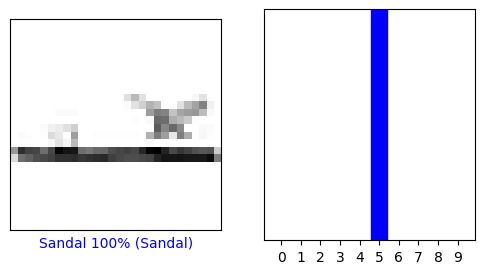

In [56]:
i = 90
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()


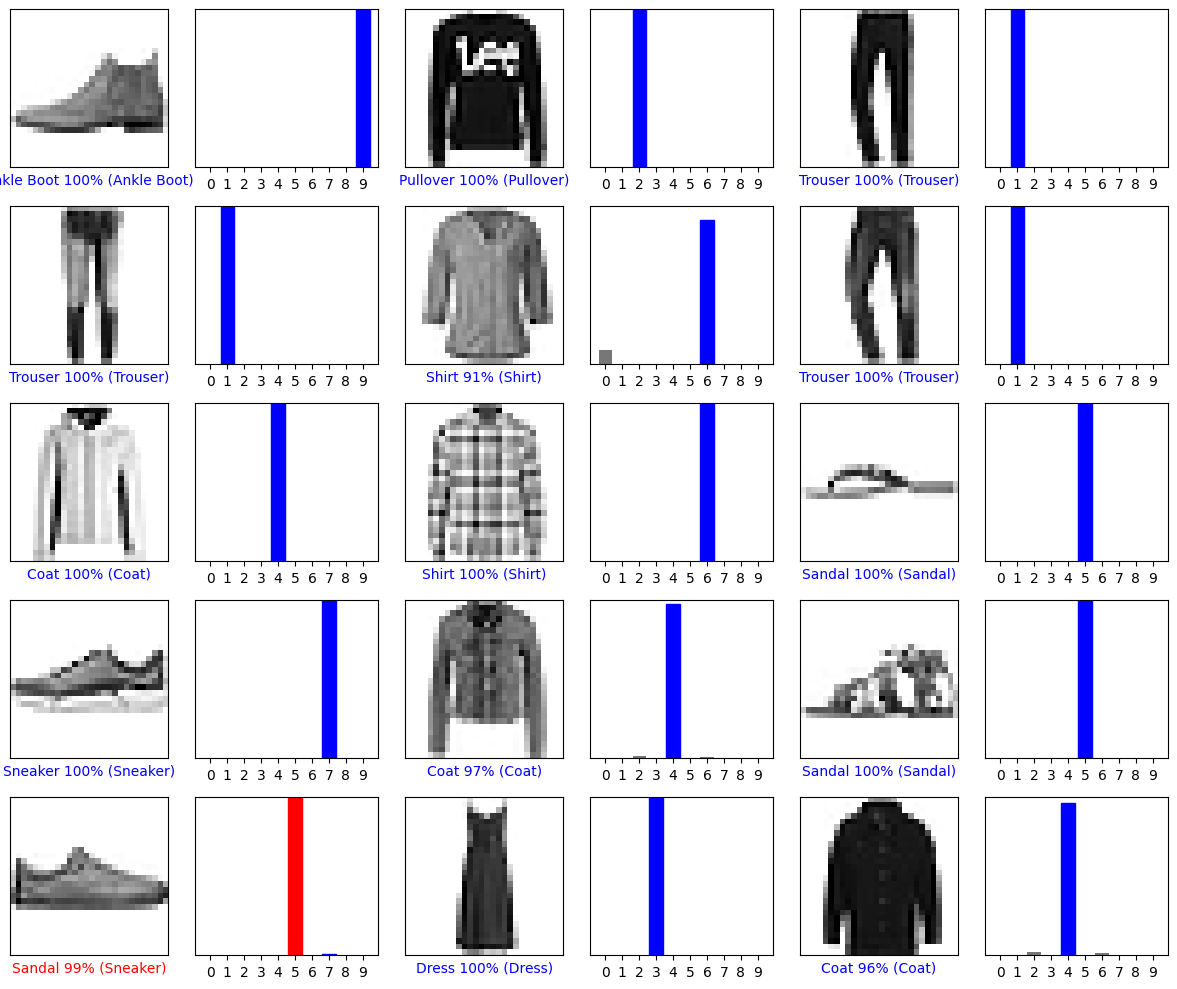

In [57]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()
